<a href="https://colab.research.google.com/github/fadhilurrizki/ml-datasets/blob/master/Machine_Learning_Workshop_Mushroom_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Workshop - Case Study Mushroom Dataset

---
Pada sesi ini, akan dibahas step by step pengolahan data, untuk melakukan klasifikasi jamur berdasarkan beracun atau tidak nya. 

Dataset berasal dari : https://www.kaggle.com/uciml/mushroom-classification/downloads/mushroom-classification.zip/1

### Firstly, Download the Dataset at -> https://github.com/fadhilurrizki/ml-datasets

sebelum masuk ke dataset, alangkah baiknya kita kenali dulu bagian bagian dari jamur. 

![mushroom](https://infovisual.info/storage/app/media/01/img_en/024%20Mushroom.jpg)

## Dataset Description
Attribute Information: (classes: edible=e, poisonous=p)

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,  pink=p, purple=u, red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r, orange=o, pink=p, purple=u, red=e,    white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

8. Missing Attribute Values: 2480 of them (denoted by "?"), all for
   attribute #11.

9. Class Distribution: 
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances

In [15]:
!git clone https://github.com/fadhilurrizki/ml-datasets.git

Cloning into 'ml-datasets'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [12]:
!pip install pandasql


  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26818 sha256=70e3cbf79c9a6cf6a8abdcf61ee80c3c819ffa99dc67034c11b29bb67c0d429a
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [16]:
data = pd.read_csv('ml-datasets/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [17]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [18]:
data['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [19]:
data[data['stalk-root'] == '?'].shape

(2480, 23)



Untuk dapat diproses ke dalam metode machine learning, maka semua fitur perlu diubah ke dalam angka terlebih dahulu. 

Berdasarkan dataset yang diberikan, maka kita dapat menyatakan bahwa semua atribut yang ada merupakan **Categorical**

Sehingga, untuk semua atribut, perlu dilakukan mapping value dari char ke categorical integer

## Mapping Functions

In [22]:
nominal_data = data
nominal_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Dari sini terlihat bahwa null value yang dimaksud pada kolom stalk-root, di-mapping-kan ke category 4 pada kolom stalk-root.

In [23]:
for col in data.columns :
  nominal_data[col] = data[col].astype("category",
    ordered=True,
    categories=data[col].unique()
  ).cat.codes

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
nominal_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2,1


In [25]:
nominal_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,1.637617,0.971935,2.093550,0.584441,3.589365,0.025849,0.161497,0.690793,4.274249,0.567208,2.290005,0.660758,0.994584,1.149680,1.061546,0.0,0.038405,0.082718,0.696209,2.200886,2.687839,2.794682
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,0.495493,1.334434,0.908808,1.333097,1.563541,1.648595,0.0,0.257837,0.291116,0.786930,1.742226,1.381200,1.617549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,1.000000,4.000000,2.000000,3.000000,2.000000,1.000000,0.0,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [26]:
data[data['stalk-root'] == '?'].head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [27]:
nominal_data['stalk-root'].iloc[3984]

4

Oke, dari sini terlihat bahwa null value yang dimaksud pada kolom stalk-root, di-mapping-kan ke category 4 pada kolom tersebut.

Let's ignore the missing value first. anggap semua missing value merupakan kategori baru yang  intended as it is

## Machine Learning Modelling

#### Train-Test Split 

In [28]:
nominal_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,2,1


In [31]:
nominal_data["class"].astype('float')
feature = nominal_data.drop('class', axis=1)
label = nominal_data['class']
print('Number of Feature Sample : ' + str(feature.shape[0]))

Number of Feature Sample : 8124


In [32]:
nominal_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,1.637617,0.971935,2.093550,0.584441,3.589365,0.025849,0.161497,0.690793,4.274249,0.567208,2.290005,0.660758,0.994584,1.149680,1.061546,0.0,0.038405,0.082718,0.696209,2.200886,2.687839,2.794682
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,0.495493,1.334434,0.908808,1.333097,1.563541,1.648595,0.0,0.257837,0.291116,0.786930,1.742226,1.381200,1.617549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,1.000000,4.000000,2.000000,3.000000,2.000000,1.000000,0.0,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Feature Importance 

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

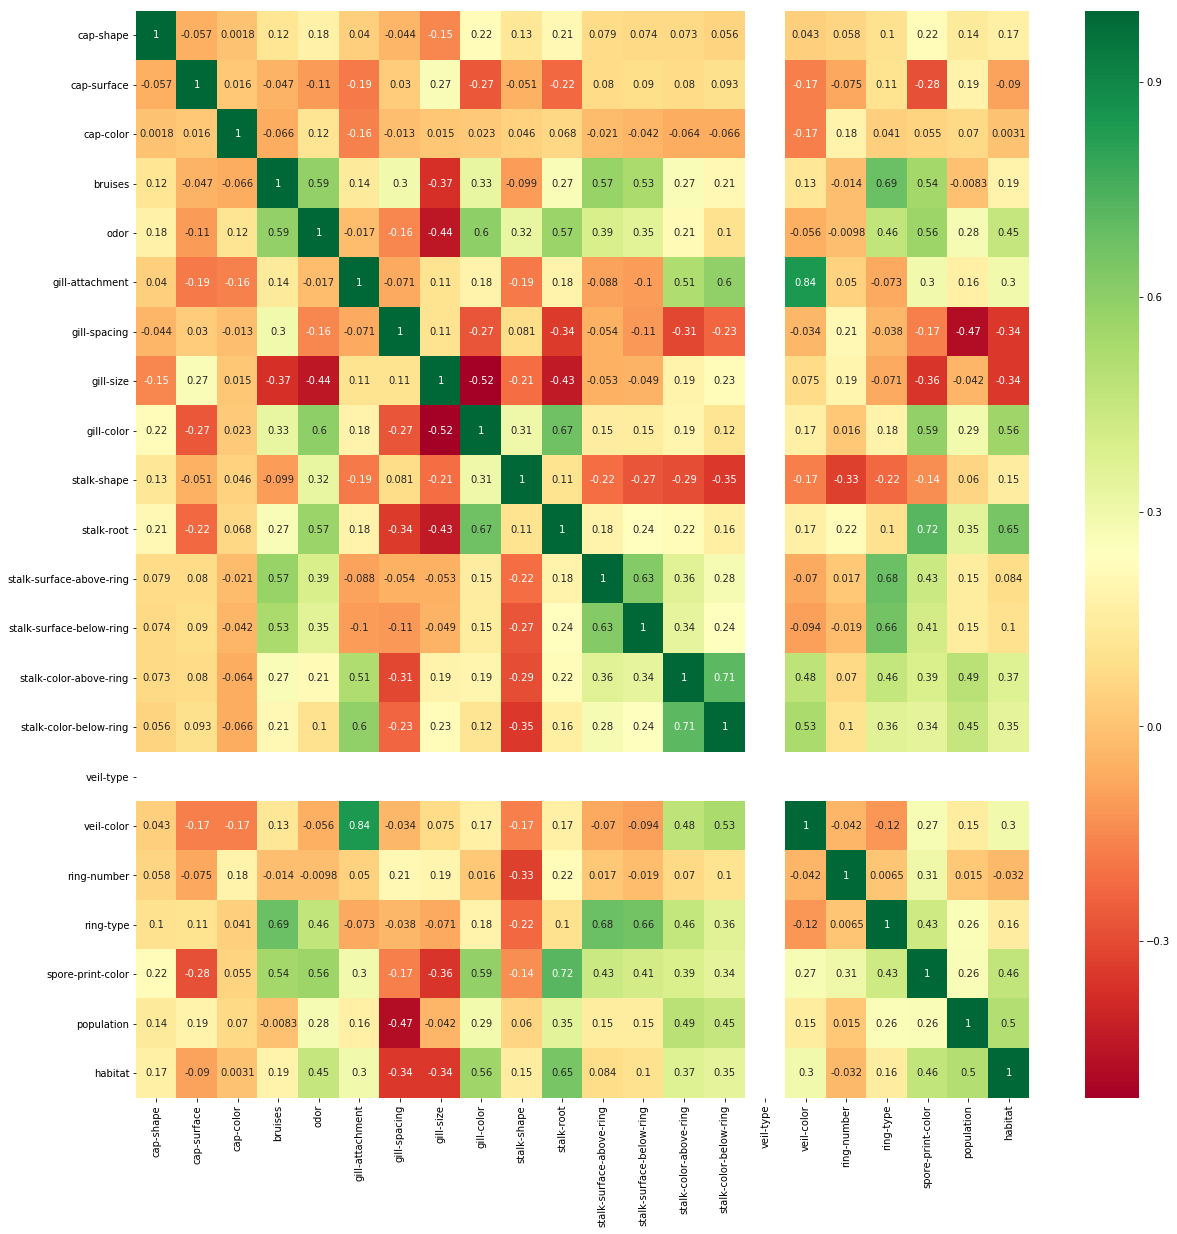

In [36]:
corr_ = feature.corr()
top_corr_features = corr_.index
plt.figure(figsize=(20,20))
g=sns.heatmap(feature[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Modelling

In [0]:
import sklearn

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf = DecisionTreeClassifier()
clf.fit(feature,label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
result = clf.predict(feature)

In [0]:
from sklearn.metrics import f1_score

In [42]:
f1_score(label, result)

1.0